In [1]:
import numpy as np
import tensorflow as tf
import sionna.rt as rt

import matplotlib.pyplot as plt

2024-10-06 14:38:58.494970: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 14:38:58.494998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 14:38:58.495859: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 14:38:58.501095: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-06 14:38:59.058311: W tensorflow/compiler/tf2

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2024-10-06 14:39:18.500540: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-06 14:39:18.500887: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-06 14:39:18.501051: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
MITSUBA_XML_PATH = "/home/Anant/SionnaRT/Setup/Assets/HomeOfficeMitsuba/HomeOffice.xml"
scene = rt.load_scene(MITSUBA_XML_PATH)

2024-10-06 14:39:25.182947: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-06 14:39:25.183171: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-06 14:39:25.183335: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
scene.tx_array = rt.PlanarArray(num_rows=4, num_cols=4, vertical_spacing=0.5, horizontal_spacing=0.5, pattern="iso", polarization = "V")
scene.rx_array = rt.PlanarArray(num_rows=4, num_cols=4, vertical_spacing=0.5, horizontal_spacing=0.5, pattern="iso", polarization = "V")

In [5]:
tx = rt.Transmitter("tx", [4,-7,1], [0.0, 0.0, 0.0])
scene.add(tx)
rx = rt.Receiver("rx", [-5,-6,1], [0.0, 0.0, 0.0])
scene.add(rx)

In [6]:
scene.preview()

Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, …

In [25]:
cm = scene.coverage_map(cm_cell_size=(0.05, 0.05), max_depth = 6)

In [24]:
scene.preview(coverage_map=cm)

Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, matrixWorldNeedsUpda…

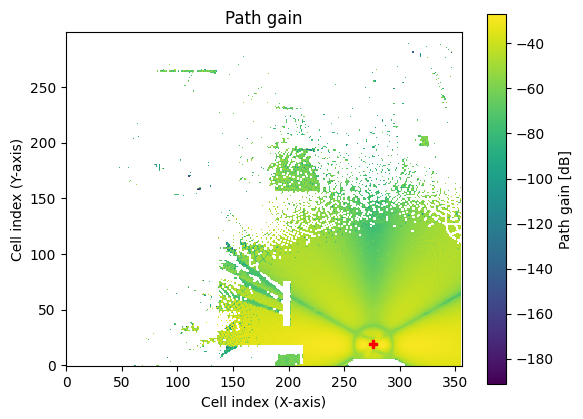

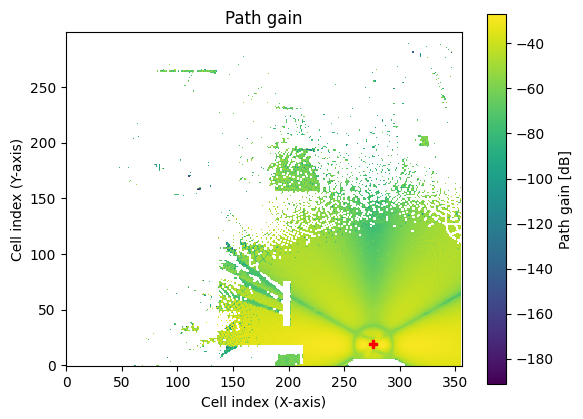

In [26]:
cm.show()

In [ ]:
# !jupyter nbextension enable --py widgetsnbextension
# !jupyter nbextension enable --py --sys-prefix pythreejs

In [ ]:
# !pip list

In [ ]:
print(tf.config.list_physical_devices('GPU'))

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)